## Project 1: Tabular dataset

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('fars.csv')
print(data.shape)
list(data)

(100968, 30)


['CASE_STATE',
 'AGE',
 'SEX',
 'PERSON_TYPE',
 'SEATING_POSITION',
 'RESTRAINT_SYSTEM-USE',
 'AIR_BAG_AVAILABILITY/DEPLOYMENT',
 'EJECTION',
 'EJECTION_PATH',
 'EXTRICATION',
 'NON_MOTORIST_LOCATION',
 'POLICE_REPORTED_ALCOHOL_INVOLVEMENT',
 'METHOD_ALCOHOL_DETERMINATION',
 'ALCOHOL_TEST_TYPE',
 'ALCOHOL_TEST_RESULT',
 'POLICE-REPORTED_DRUG_INVOLVEMENT',
 'METHOD_OF_DRUG_DETERMINATION',
 'DRUG_TEST_TYPE_(1_of_3)',
 'DRUG_TEST_RESULTS_(1_of_3)',
 'DRUG_TEST_TYPE_(2_of_3)',
 'DRUG_TEST_RESULTS_(2_of_3)',
 'DRUG_TEST_TYPE_(3_of_3)',
 'DRUG_TEST_RESULTS_(3_of_3)',
 'HISPANIC_ORIGIN',
 'TAKEN_TO_HOSPITAL',
 'RELATED_FACTOR_(1)-PERSON_LEVEL',
 'RELATED_FACTOR_(2)-PERSON_LEVEL',
 'RELATED_FACTOR_(3)-PERSON_LEVEL',
 'RACE',
 'INJURY_SEVERITY']

In [4]:
data['AGE'].value_counts()


AGE
18    3594
19    3432
20    3140
21    3111
17    3100
      ... 
93      30
94      23
97      23
95      21
96      11
Name: count, Length: 99, dtype: int64

In [27]:
dataClean = data.drop(columns=['AIR_BAG_AVAILABILITY/DEPLOYMENT', 'HISPANIC_ORIGIN','EJECTION','EJECTION_PATH','EXTRICATION','RELATED_FACTOR_(1)-PERSON_LEVEL','RELATED_FACTOR_(2)-PERSON_LEVEL','RELATED_FACTOR_(3)-PERSON_LEVEL','RACE'])

In [28]:
#checking for the missing values in all columns
df_cleaned = data.replace("Unknown", pd.NA)
print(df_cleaned)

       CASE_STATE  AGE     SEX                                PERSON_TYPE  \
0         Alabama   34    Male                                     Driver   
1         Alabama   20    Male                                     Driver   
2         Alabama   43    Male                                     Driver   
3         Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50    Male                                     Driver   
...           ...  ...     ...                                        ...   
100963    Wyoming   10  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61    Male                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \


In [7]:
withoutMissingAge = dataClean.drop(dataClean[dataClean.AGE=='Unknown'].index)
print(withoutMissingAge.count())
medianAge = withoutMissingAge['AGE'].median()
dataClean['AGE'].replace(['Unknown'], [medianAge],inplace=True)
dataClean

CASE_STATE                             100968
AGE                                    100968
SEX                                    100968
PERSON_TYPE                            100968
SEATING_POSITION                       100968
RESTRAINT_SYSTEM-USE                   100968
NON_MOTORIST_LOCATION                  100968
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    100968
METHOD_ALCOHOL_DETERMINATION           100968
ALCOHOL_TEST_TYPE                      100968
ALCOHOL_TEST_RESULT                    100968
POLICE-REPORTED_DRUG_INVOLVEMENT       100968
METHOD_OF_DRUG_DETERMINATION           100968
DRUG_TEST_TYPE_(1_of_3)                100968
DRUG_TEST_RESULTS_(1_of_3)             100968
DRUG_TEST_TYPE_(2_of_3)                100968
DRUG_TEST_RESULTS_(2_of_3)             100968
DRUG_TEST_TYPE_(3_of_3)                100968
DRUG_TEST_RESULTS_(3_of_3)             100968
TAKEN_TO_HOSPITAL                      100968
INJURY_SEVERITY                        100968
dtype: int64


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,NON_MOTORIST_LOCATION,POLICE_REPORTED_ALCOHOL_INVOLVEMENT,METHOD_ALCOHOL_DETERMINATION,ALCOHOL_TEST_TYPE,...,POLICE-REPORTED_DRUG_INVOLVEMENT,METHOD_OF_DRUG_DETERMINATION,DRUG_TEST_TYPE_(1_of_3),DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),TAKEN_TO_HOSPITAL,INJURY_SEVERITY
0,Alabama,34,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Not_Applicable_-_Vehicle_Occupant,Yes_(Alcohol_Involved),Not_Reported,Whole_Blood,...,Reported_Unknown,Not_Reported,Unknown_if_Tested_for_Drugs,999,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,No,Fatal_Injury
1,Alabama,20,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),None_Used/Not_Applicable,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,No_Drugs,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,No,Fatal_Injury
2,Alabama,43,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,No_Drugs,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,No,Fatal_Injury
3,Alabama,38,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Front_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Not_Applicable_-_Vehicle_Occupant,Not_reported,Not_Reported,Not_Tested_for_Alcohol,...,Not_Reported,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Incapaciting_Injury
4,Alabama,50,Male,Driver,Front_Seat_-_Left_Side_(Drivers_Side),Lap_and_Shoulder_Belt,Not_Applicable_-_Vehicle_Occupant,Yes_(Alcohol_Involved),Not_Reported,Whole_Blood,...,Reported_Unknown,Not_Reported,Unknown_if_Tested_for_Drugs,999,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Fatal_Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,Wyoming,10,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Left_Side,Lap_and_Shoulder_Belt,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,Not_Reported,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Possible_Injury
100964,Wyoming,9,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Right_Side,Lap_and_Shoulder_Belt,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,Not_Reported,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Possible_Injury
100965,Wyoming,7,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,Not_Reported,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Possible_Injury
100966,Wyoming,4,Female,Passenger_of_a_Motor_Vehicle_in_Transport,Second_Seat_-_Middle,Lap_Belt,Not_Applicable_-_Vehicle_Occupant,No_(Alcohol_Not_Involved),Not_Reported,Not_Tested_for_Alcohol,...,Not_Reported,Not_Reported,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Not_Tested_for_Drugs,0,Yes,Possible_Injury


In [8]:
# compute the pair wise correlation for all columns
data  = dataClean


In [9]:
df_cleaned = data.replace("Unknown", pd.NA).count()
df_cleaned

CASE_STATE                             100968
AGE                                    100968
SEX                                     99313
PERSON_TYPE                            100968
SEATING_POSITION                        99200
RESTRAINT_SYSTEM-USE                    91951
NON_MOTORIST_LOCATION                  100907
POLICE_REPORTED_ALCOHOL_INVOLVEMENT    100968
METHOD_ALCOHOL_DETERMINATION           100968
ALCOHOL_TEST_TYPE                      100968
ALCOHOL_TEST_RESULT                    100968
POLICE-REPORTED_DRUG_INVOLVEMENT       100968
METHOD_OF_DRUG_DETERMINATION           100968
DRUG_TEST_TYPE_(1_of_3)                100968
DRUG_TEST_RESULTS_(1_of_3)             100968
DRUG_TEST_TYPE_(2_of_3)                100968
DRUG_TEST_RESULTS_(2_of_3)             100968
DRUG_TEST_TYPE_(3_of_3)                100968
DRUG_TEST_RESULTS_(3_of_3)             100968
TAKEN_TO_HOSPITAL                       99054
INJURY_SEVERITY                        100067
dtype: int64

In [10]:
sexOne = pd.get_dummies(dataClean['SEX'],prefix='sex')
dataClean1 = dataClean.join(sexOne)
dataClean1 = dataClean1.drop(columns=['SEX'])
print(dataClean1)

       CASE_STATE  AGE                                PERSON_TYPE  \
0         Alabama   34                                     Driver   
1         Alabama   20                                     Driver   
2         Alabama   43                                     Driver   
3         Alabama   38  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50                                     Driver   
...           ...  ...                                        ...   
100963    Wyoming   10  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \
0       Front_Seat_-_Left_Side_(Drivers_Side)  None_Used/Not_Applicable   
1       Front_Seat_-_

In [11]:
print(data)

       CASE_STATE  AGE     SEX                                PERSON_TYPE  \
0         Alabama   34    Male                                     Driver   
1         Alabama   20    Male                                     Driver   
2         Alabama   43    Male                                     Driver   
3         Alabama   38  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
4         Alabama   50    Male                                     Driver   
...           ...  ...     ...                                        ...   
100963    Wyoming   10  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100964    Wyoming    9  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100965    Wyoming    7  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100966    Wyoming    4  Female  Passenger_of_a_Motor_Vehicle_in_Transport   
100967    Wyoming   61    Male                                     Driver   

                             SEATING_POSITION      RESTRAINT_SYSTEM-USE  \


In [12]:
rows_with_unknown = data[data.apply(lambda row: any(row == "Unknown"), axis=1)].index
rows_with_unknown.value_counts().count()

11577

In [13]:
data = data.drop(rows_with_unknown)

In [14]:
#encode all the string columns into numeric 
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

string_columns = data.select_dtypes(include=["object"]).columns
for column in string_columns:
    data[column] = le.fit_transform(data[column])

data


,CASE_STATE,AGE,SEX,PERSON_TYPE,SEATING_POSITION,RESTRAINT_SYSTEM-USE,NON_MOTORIST_LOCATION,POLICE_REPORTED_ALCOHOL_INVOLVEMENT,METHOD_ALCOHOL_DETERMINATION,ALCOHOL_TEST_TYPE,...,POLICE-REPORTED_DRUG_INVOLVEMENT,METHOD_OF_DRUG_DETERMINATION,DRUG_TEST_TYPE_(1_of_3),DRUG_TEST_RESULTS_(1_of_3),DRUG_TEST_TYPE_(2_of_3),DRUG_TEST_RESULTS_(2_of_3),DRUG_TEST_TYPE_(3_of_3),DRUG_TEST_RESULTS_(3_of_3),TAKEN_TO_HOSPITAL,INJURY_SEVERITY
0,0,34,1,1,3,7,16,3,2,9,...,3,3,5,999,2,0,2,0,0,1
1,0,20,1,1,3,7,16,0,2,4,...,1,3,2,0,2,0,2,0,0,1
2,0,43,1,1,3,5,16,0,2,4,...,1,3,2,0,2,0,2,0,0,1
3,0,38,0,6,6,5,16,1,2,4,...,2,3,2,0,2,0,2,0,1,2
4,0,50,1,1,3,5,16,3,2,9,...,3,3,5,999,2,0,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100963,50,10,0,6,13,5,16,0,2,4,...,2,3,2,0,2,0,2,0,1,6
100964,50,9,0,6,16,5,16,0,2,4,...,2,3,2,0,2,0,2,0,1,6
100965,50,7,0,6,14,4,16,0,2,4,...,2,3,2,0,2,0,2,0,1,6
100966,50,4,0,6,14,4,16,0,2,4,...,2,3,2,0,2,0,2,0,1,6


In [15]:
X = data.drop("INJURY_SEVERITY", axis=1)
y = data["INJURY_SEVERITY"]
y

0         1
1         1
2         1
3         2
4         1
         ..
100963    6
100964    6
100965    6
100966    6
100967    1
Name: INJURY_SEVERITY, Length: 89391, dtype: int32

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import classification_report
# Feature selection using RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

C:\Users\Broodingspace\AppData\Local\Temp\ipykernel_13284\2731182087.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['AGE'], bins=50)


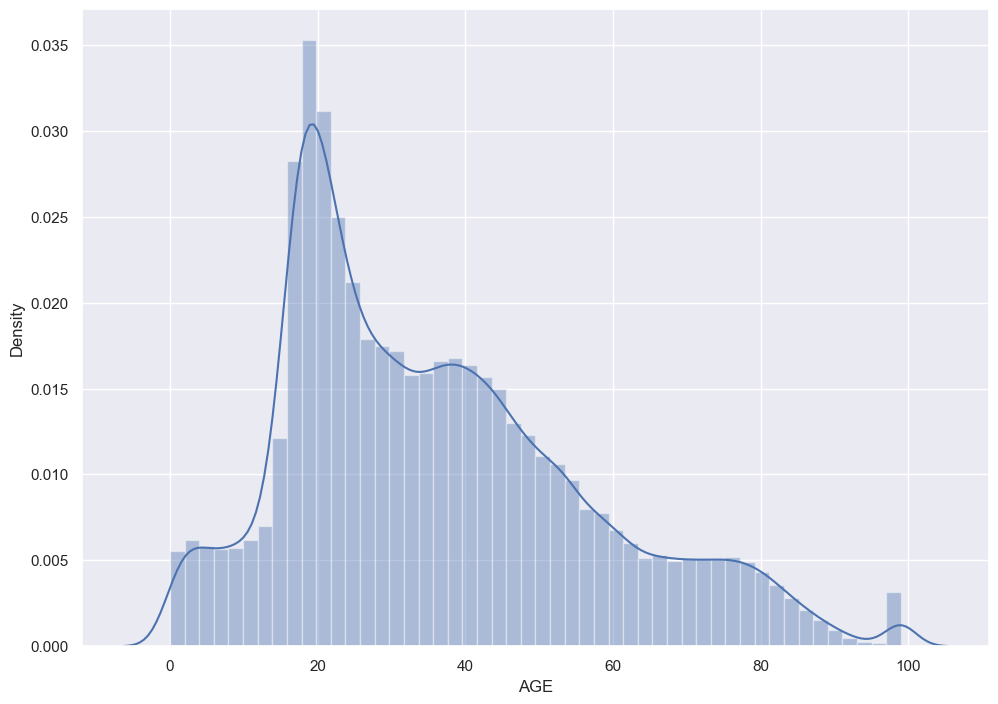

In [18]:
# plot a histogram showing the distribution of the AGE Group
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(data['AGE'], bins=50)
plt.show()

In [19]:
correlation_matrix = data.corr().round(2)

<Axes: >

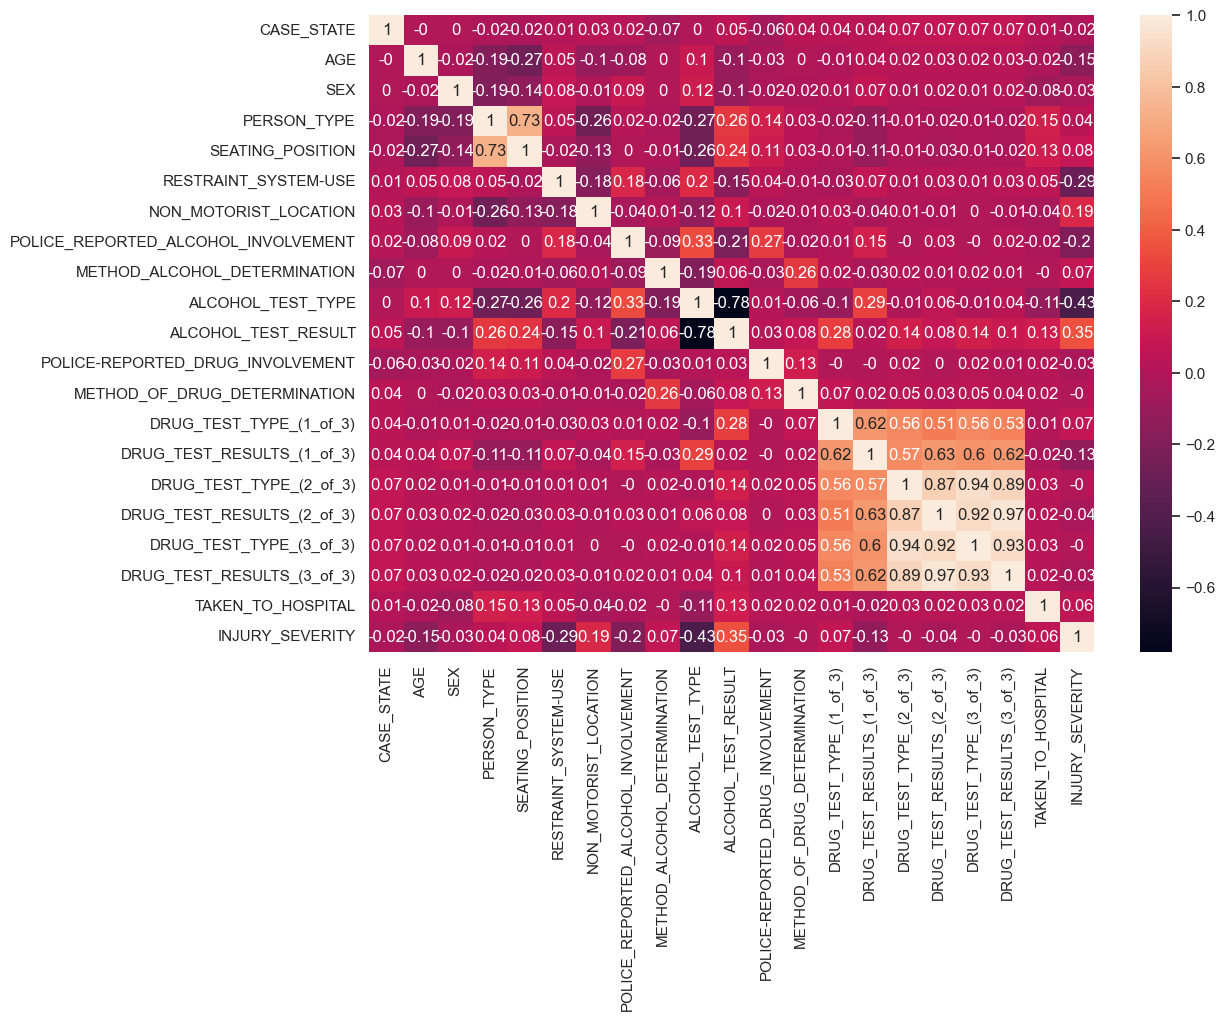

In [20]:
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

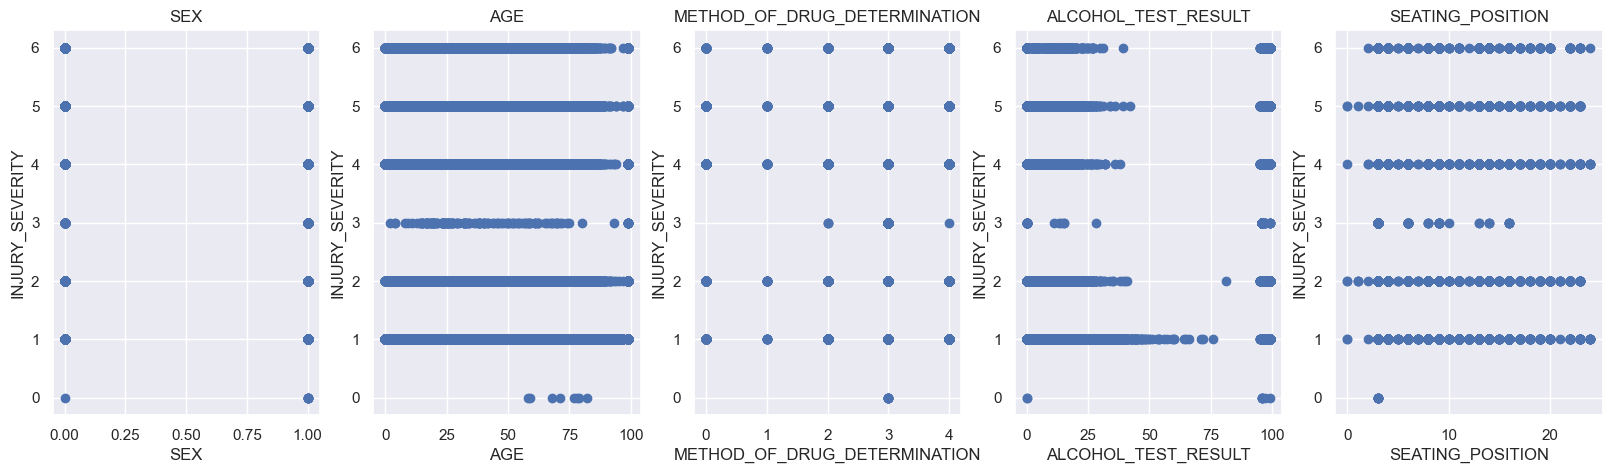

In [21]:
plt.figure(figsize=(20,5))
feature = ['SEX',"AGE",'METHOD_OF_DRUG_DETERMINATION','ALCOHOL_TEST_RESULT','SEATING_POSITION']
target = data['INJURY_SEVERITY']

for i, col in enumerate(feature):
    plt.subplot(1,len(feature),i+1)
    x = data[col]
    y = target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('INJURY_SEVERITY')